In [23]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [2]:
credit_c = pd.read_csv("dataset/credit_customers.csv")
credit = credit_c.copy() # create a copy of original dataset
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


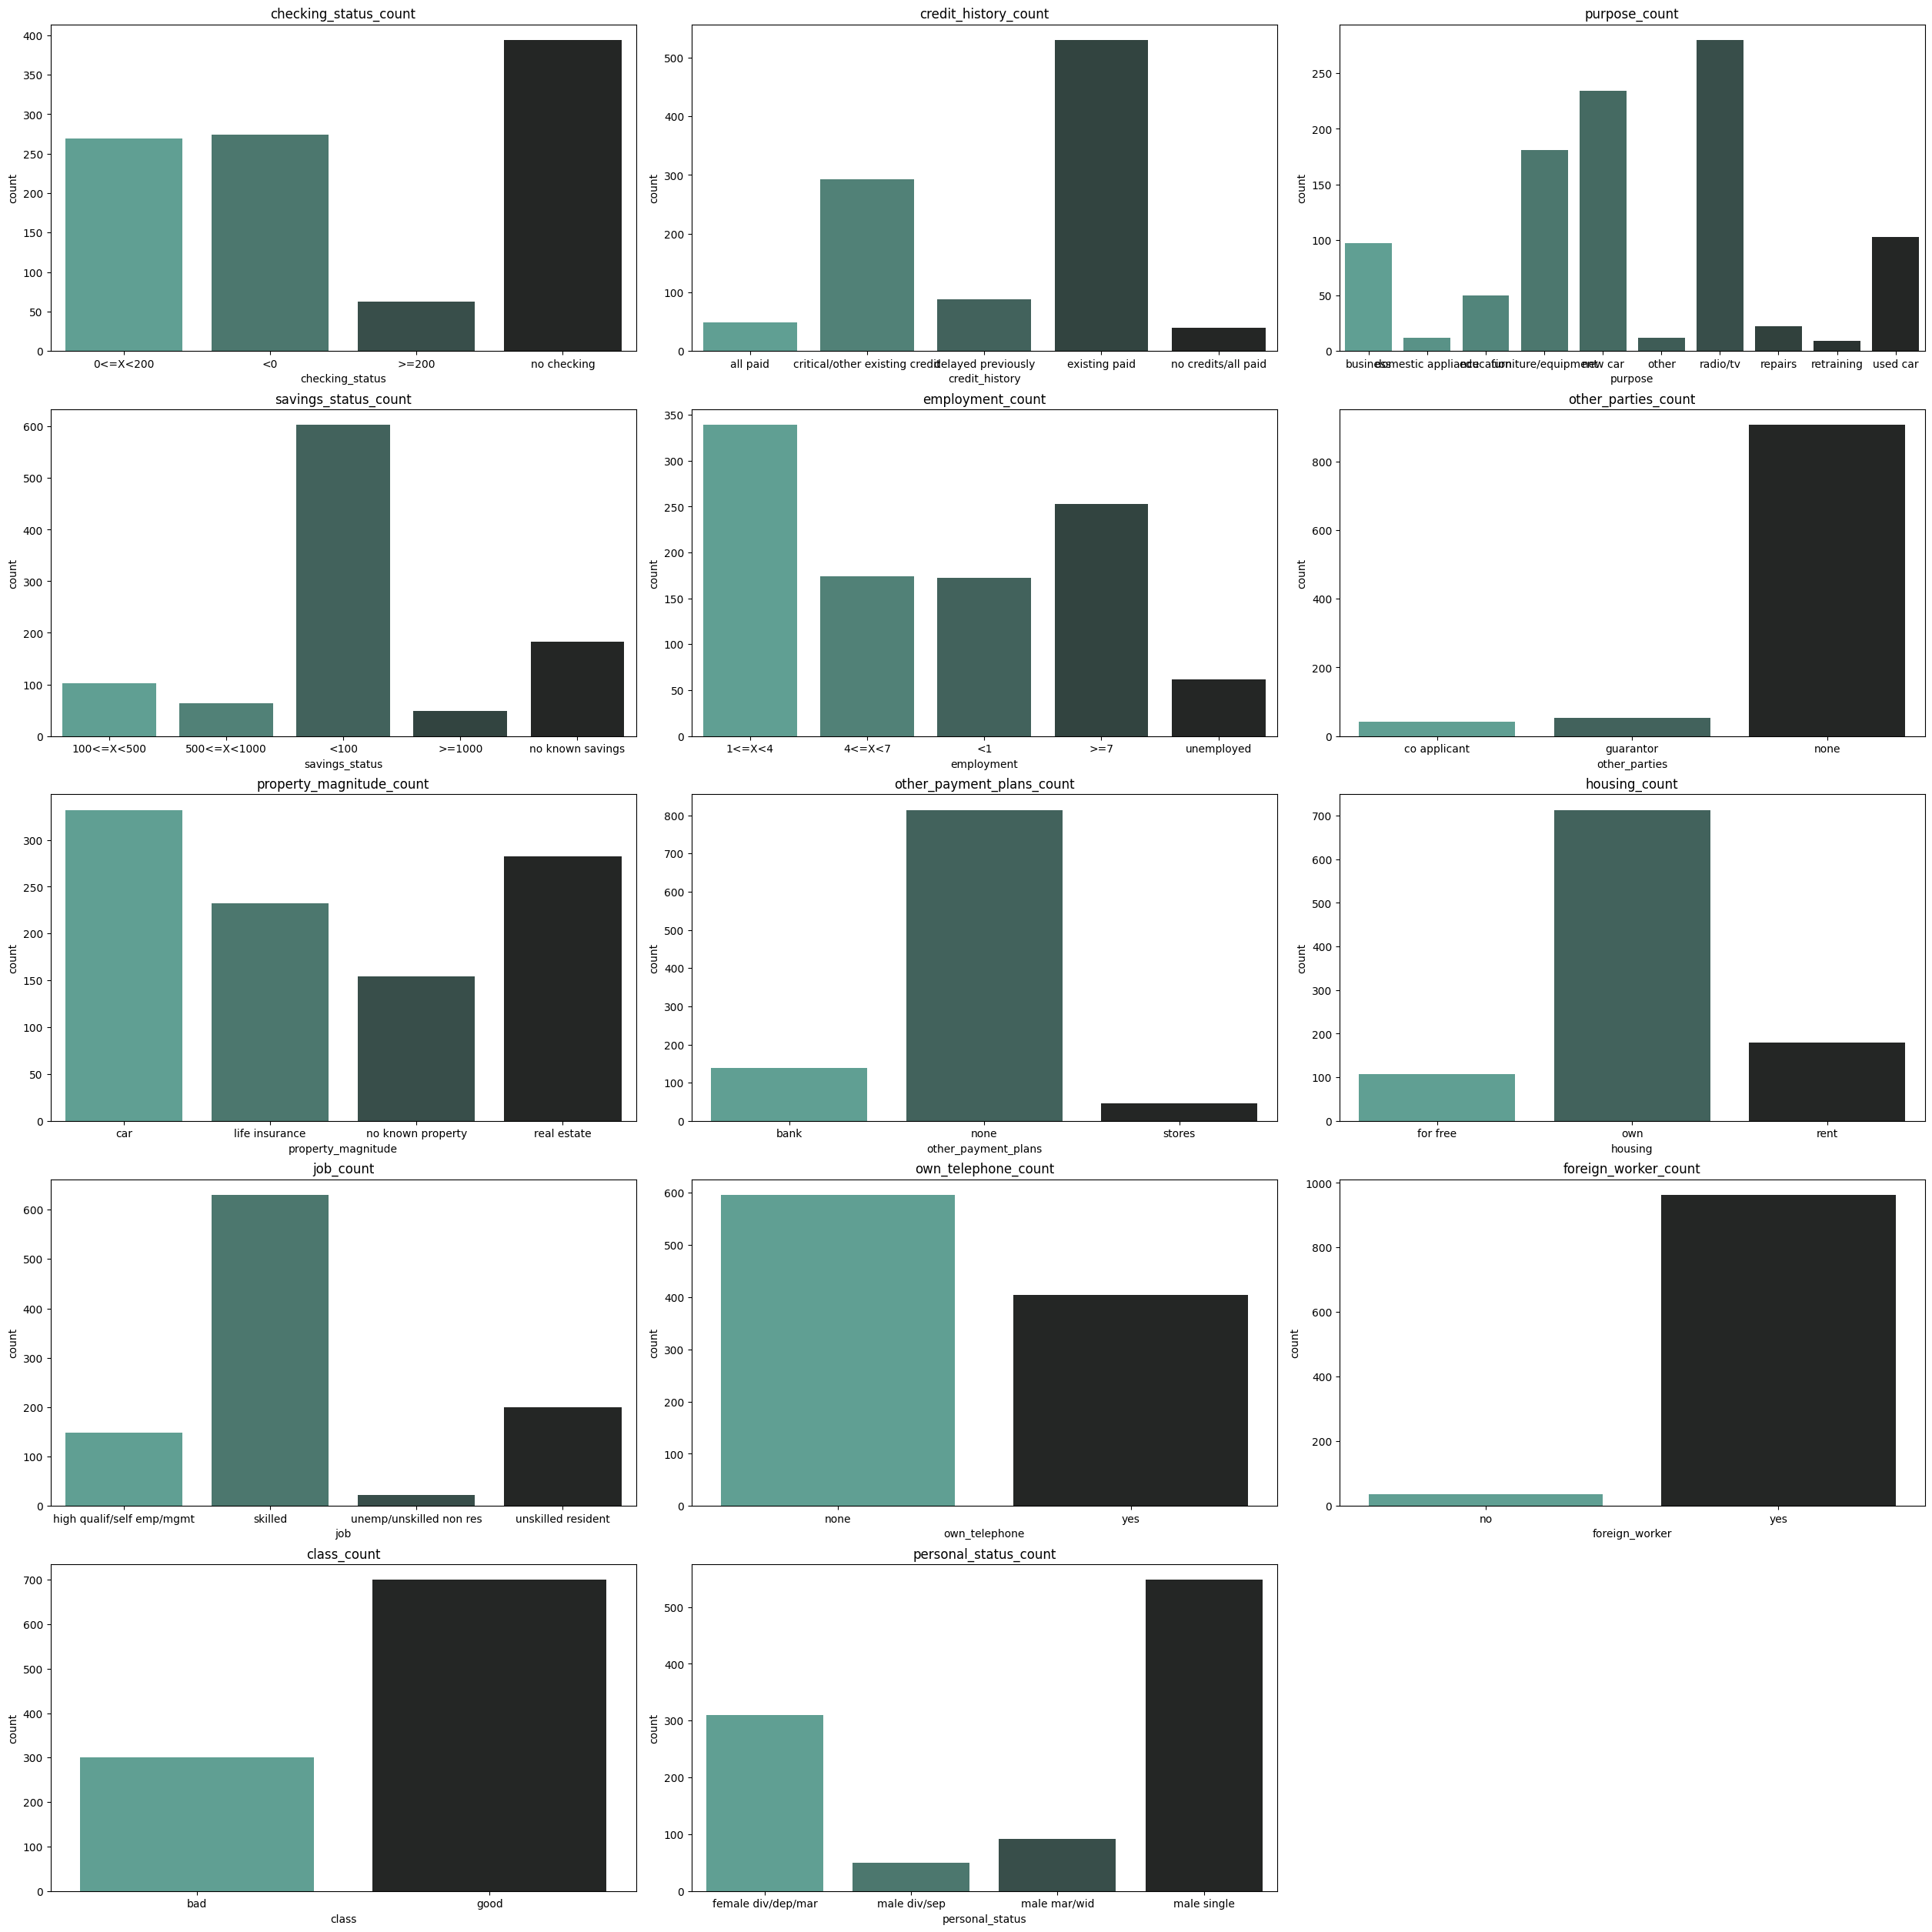

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

array=['checking_status', 'credit_history', 'purpose', 'savings_status','employment', 'other_parties', 'property_magnitude','other_payment_plans', 'housing', 'job', 'own_telephone',
     'foreign_worker', 'class', 'personal_status']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(array)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=credit, x=array[i], palette='dark:#5A9_r',)
    plt.title(lst[i]+'_count',)
plt.show()

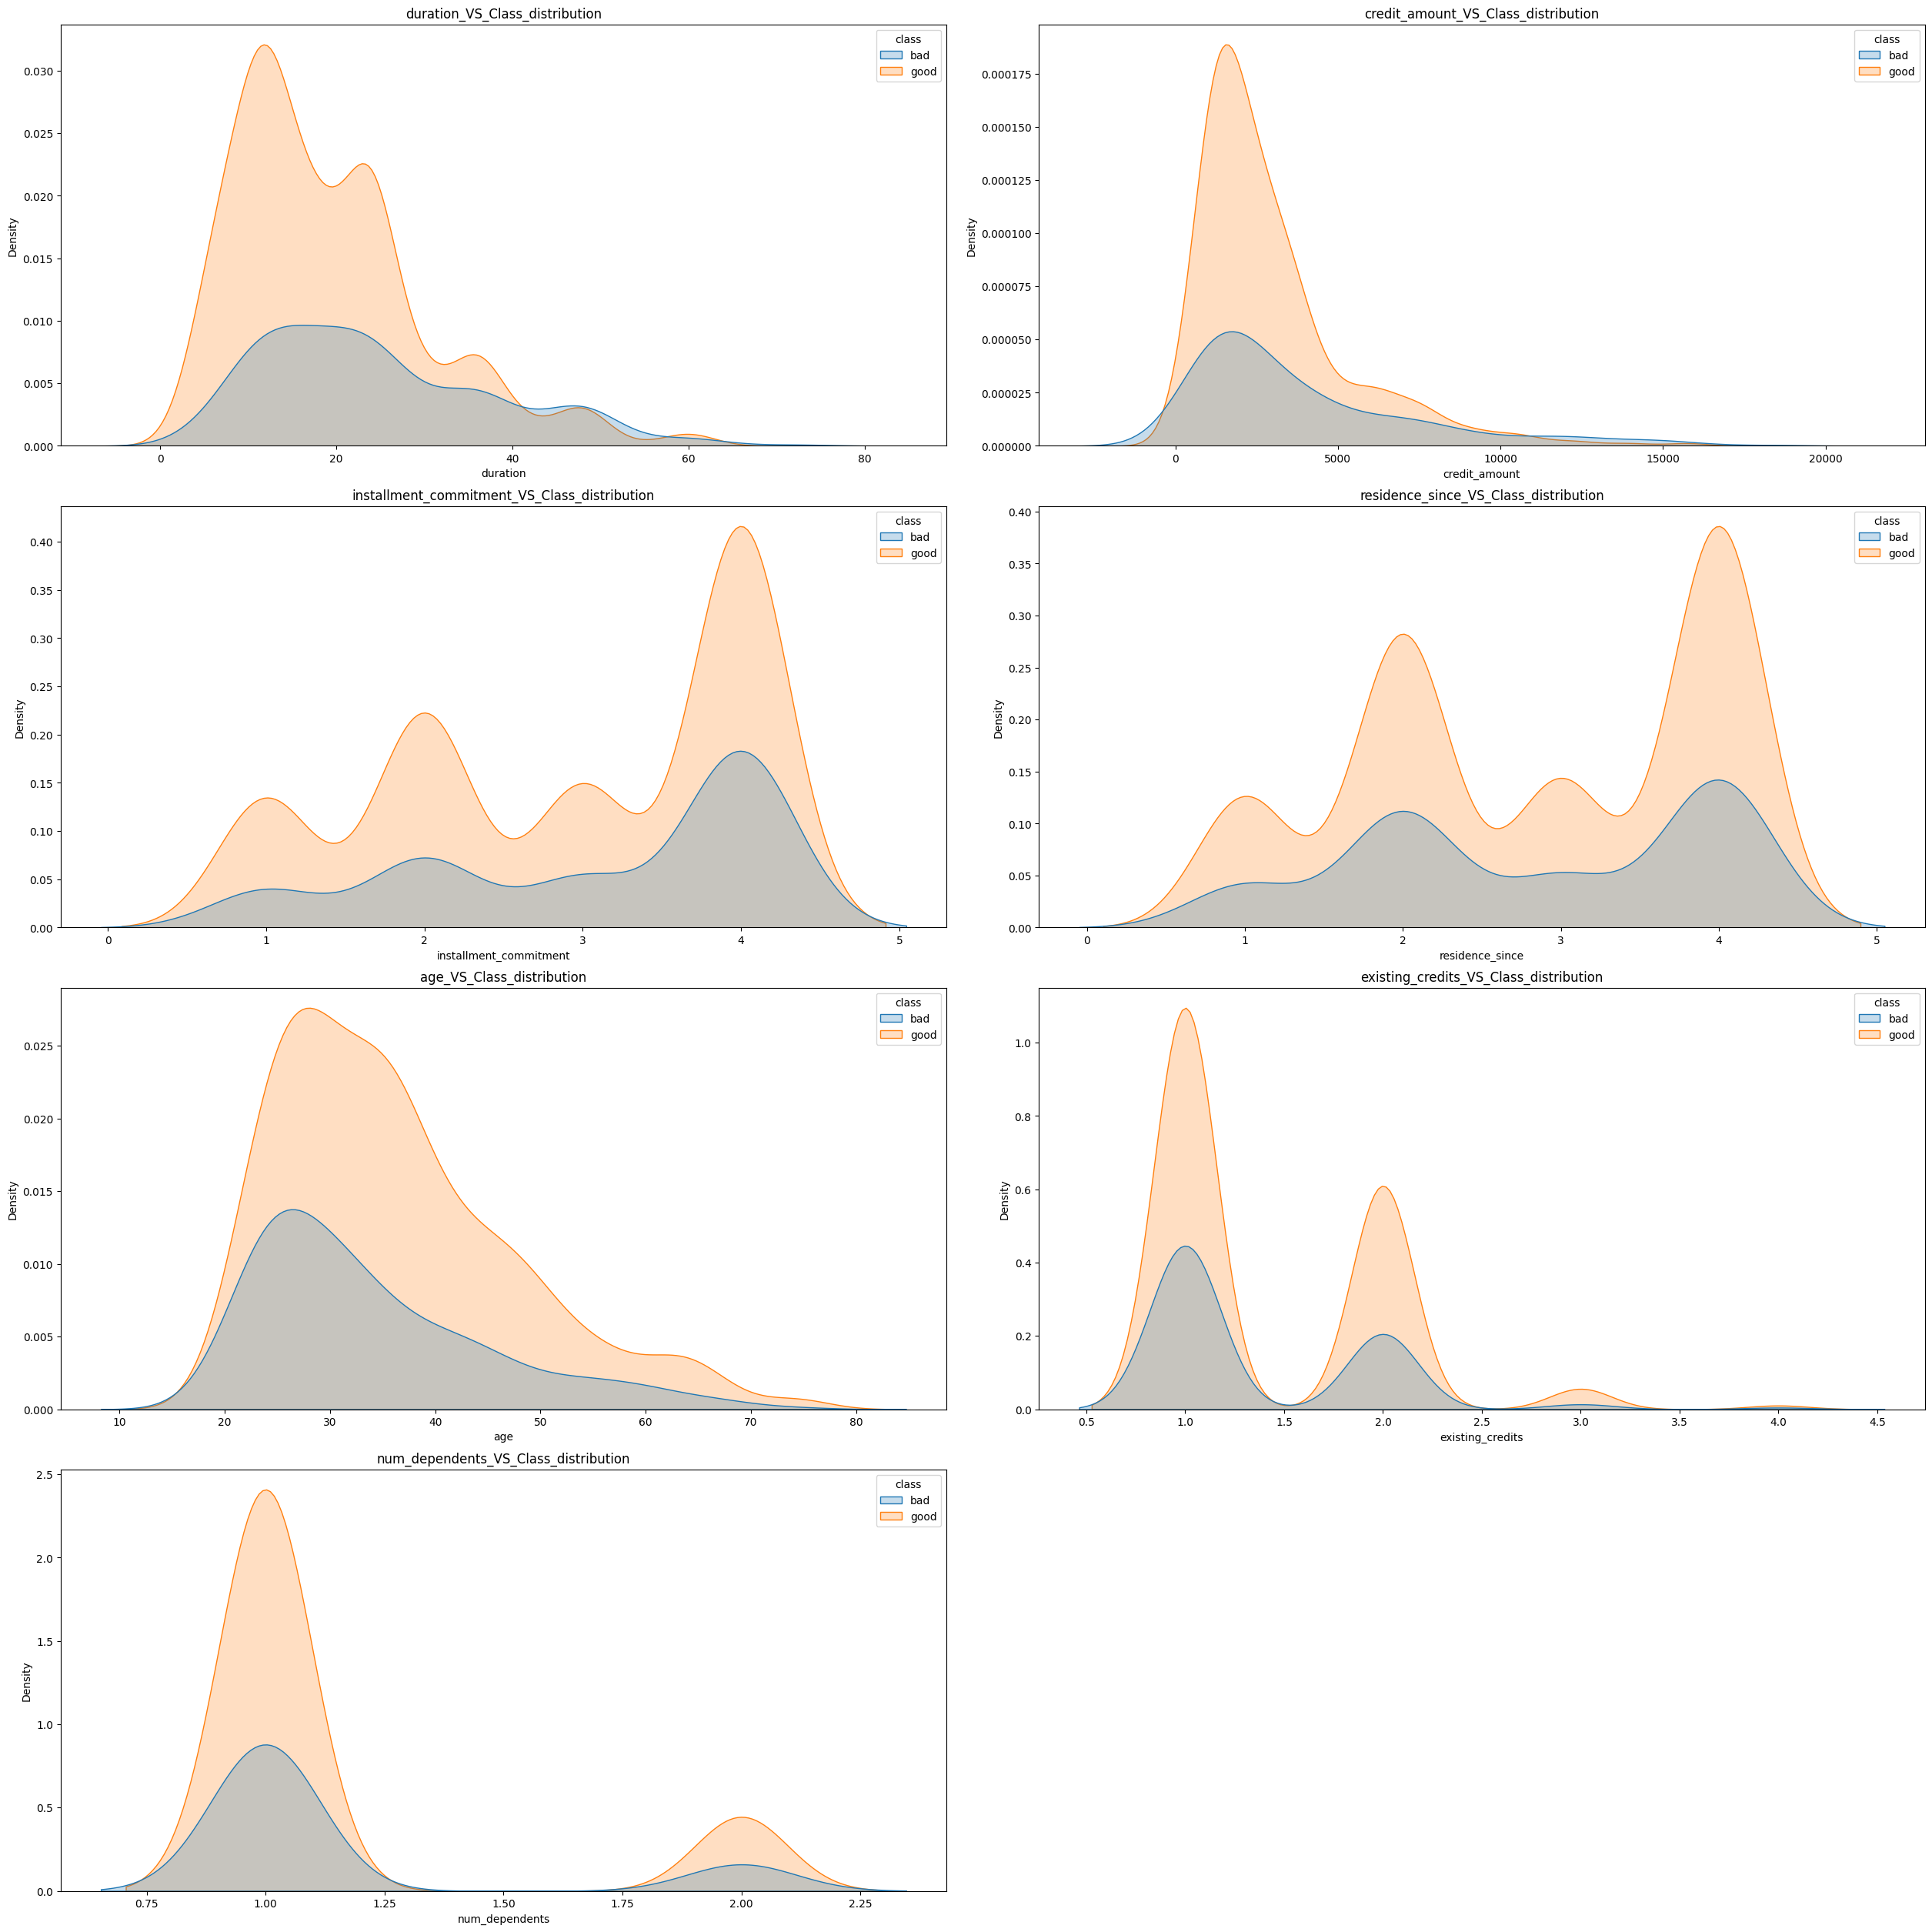

In [28]:
lst=['duration', 'credit_amount', 'installment_commitment','residence_since', 'age', 'existing_credits', 'num_dependents']
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(lst)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=credit,x=lst[i],hue='class',fill=True)
    plt.title(lst[i]+'_VS_Class_distribution')
plt.show()

# Data preparation

In [15]:
# Checking Null Values
credit.isnull().sum()

checking_status                0
duration                       0
credit_history                 0
purpose                        0
credit_amount                  0
savings_status                 0
employment                     0
installment_commitment         0
personal_status                0
other_parties                  0
residence_since                0
property_magnitude             0
age                            0
other_payment_plans            0
housing                        0
existing_credits               0
job                            0
num_dependents                 0
own_telephone                  0
foreign_worker                 0
class                          0
checking_status_encoder        0
credit_history_encoder         0
purpose_encoder                0
savings_status_encoder         0
employment_encoder             0
personal_status_encoder        0
other_parties_encoder          0
property_magnitude_encoder     0
other_payment_plans_encoder    0
housing_en

In [238]:
# split and remove personal status -> gender & marital_status
new = credit['personal_status'].str.split(" ", n = 1, expand = True)

credit['gender'] = new[0]
credit['marital_status'] = new[1]

credit.drop('personal_status', axis=1, inplace=True)

In [3]:
# Make objects categorical

obj = credit.select_dtypes(include='object')

for i in list(obj.columns):
    credit[i]=credit[i].astype('category')
    
credit_for_dnn = credit.copy() # copy the dataset to use for dnn
    
print(f"'Checking status' feature: \n{credit['checking_status'].head()}")

'Checking status' feature: 
0             <0
1       0<=X<200
2    no checking
3             <0
4             <0
Name: checking_status, dtype: category
Categories (4, object): ['0<=X<200', '<0', '>=200', 'no checking']


In [4]:
# Encode features

cat = credit.select_dtypes(include='category')

for i in list(cat.columns):
    credit[i+'_encoder']=LabelEncoder().fit_transform(credit[i])
    # TODO: Change LabelEncoder to OrdinalEncoder?
    
num = credit.select_dtypes(include=[np.number])

scl = pd.DataFrame(MinMaxScaler().fit_transform(num.to_numpy()),columns=num.columns)

In [5]:
scl.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_encoder,credit_history_encoder,purpose_encoder,...,employment_encoder,personal_status_encoder,other_parties_encoder,property_magnitude_encoder,other_payment_plans_encoder,housing_encoder,job_encoder,own_telephone_encoder,foreign_worker_encoder,class_encoder
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0.333333,0.25,0.666667,...,0.75,1.0,1.0,1.000000,0.5,0.5,0.333333,1.0,1.0,1.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.000000,0.75,0.666667,...,0.00,0.0,1.0,1.000000,0.5,0.5,0.333333,0.0,1.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.000000,0.25,0.222222,...,0.25,1.0,1.0,1.000000,0.5,0.5,1.000000,0.0,1.0,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.333333,0.75,0.333333,...,0.25,1.0,0.5,0.333333,0.5,0.0,0.333333,0.0,1.0,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.333333,0.50,0.444444,...,0.00,1.0,1.0,0.666667,0.5,0.0,0.333333,0.0,1.0,0.0


In [6]:
# Split dataset

X=scl.drop('class_encoder',axis=1)
Y=scl['class_encoder']


X_train = X[0:700]
Y_train = Y[0:700]

X_test = X[700:900]
Y_test = Y[700:900]

X_val = X[900:999]
Y_val = Y[900:999]

# check for class count
from collections import Counter
print('Orig shape {}'.format((Counter(Y_train))))

Orig shape Counter({1.0: 493, 0.0: 207})


# Random Forest

In [7]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
 
rf.fit(X_train, Y_train)
 
print('train score: ', rf.score(X_train, Y_train))
print('val score: ', rf.score(X_val, Y_val))

train score:  1.0
val score:  0.797979797979798


In [10]:
# try with cross-validation

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,4,5,10,15,20,30],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10,11],
    'n_estimators': [10,20,30,40,53,60,70,80],
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=10,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(X_train, Y_train)

In [18]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=6, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [11]:
rf_best = RandomForestClassifier(max_depth=20, min_samples_leaf=6, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [12]:
rf_best.fit(X_train, Y_train)
print('train score: ', rf_best.score(X_train, Y_train))
print('val score: ', rf_best.score(X_val, Y_val))

train score:  0.8728571428571429
val score:  0.7676767676767676


## Oversampling

In [245]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)

X_train_ores, y_train_ores = over_sampler.fit_resample(X_train, Y_train)

X_train_ores.shape, y_train_ores.shape

print('Orig shape {}'.format((Counter(Y_train))))
print('New shape {}'.format((Counter(y_train_ores))))

Orig shape Counter({1.0: 493, 0.0: 207})
New shape Counter({1.0: 493, 0.0: 493})


In [25]:
grid_search.fit(X_train_ores, y_train_ores)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'n_estimators': [10, 20, 30, 40, 53, 60, 70, 80]},
             scoring='accuracy', verbose=1)

In [26]:
rf_os_best = grid_search.best_estimator_
rf_os_best

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=53,
                       n_jobs=-1, random_state=42)

In [246]:
rf_os_best = RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=53,
                       n_jobs=-1, random_state=42)

In [247]:
rf_os_best.fit(X_train_ores, y_train_ores)
print('train score: ', rf_os_best.score(X_train_ores, y_train_ores))
print('val score: ', rf_os_best.score(X_val, Y_val))

train score:  0.9918864097363083
val score:  0.7373737373737373


## Undersampling

In [248]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)

X_train_ures, y_train_ures = under_sampler.fit_resample(X_train, Y_train)

X_train_ures.shape, y_train_ures.shape

print('Orig shape {}'.format((Counter(Y_train))))
print('New shape {}'.format((Counter(y_train_ures))))

Orig shape Counter({1.0: 493, 0.0: 207})
New shape Counter({0.0: 207, 1.0: 207})


In [32]:
grid_search.fit(X_train_ures, y_train_ures)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'n_estimators': [10, 20, 30, 40, 53, 60, 70, 80]},
             scoring='accuracy', verbose=1)

In [33]:
rf_us_best = grid_search.best_estimator_
rf_us_best

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [249]:
rf_us_best = RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [250]:
rf_us_best.fit(X_train_ures, y_train_ures)
print('train score: ', rf_us_best.score(X_train_ures, y_train_ures))
print('val score: ', rf_us_best.score(X_val, Y_val))

train score:  0.9951690821256038
val score:  0.6767676767676768


## Stratified Shuffle Split

In [251]:
# Split dataset into train and rest

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

for train, rest in splitter.split(X,Y):
    X_train_SS = X.iloc[train]
    y_train_SS = Y.iloc[train]
    X_rest_SS = X.iloc[rest]
    y_rest_SS = Y.iloc[rest]

print(y_train_SS.value_counts())  
print(y_rest_SS.value_counts())
print(X_train_SS.shape, X_rest_SS.shape)

1.0    490
0.0    210
Name: class_encoder, dtype: int64
1.0    210
0.0     90
Name: class_encoder, dtype: int64
(700, 21) (300, 21)


In [252]:
# Split rest into validation and test

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=42)

for val, test in splitter.split(X_rest_SS, y_rest_SS):
    X_val_SS = X_rest_SS.iloc[val]
    y_val_SS = y_rest_SS.iloc[val]
    X_test_SS = X_rest_SS.iloc[test]
    y_test_SS = y_rest_SS.iloc[test]
    
print(y_val_SS.value_counts())  
print(y_test_SS.value_counts())
print(X_val_SS.shape, X_test_SS.shape)

1.0    105
0.0     45
Name: class_encoder, dtype: int64
1.0    105
0.0     45
Name: class_encoder, dtype: int64
(150, 21) (150, 21)


In [43]:
grid_search.fit(X_train_SS, y_train_SS)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'n_estimators': [10, 20, 30, 40, 53, 60, 70, 80]},
             scoring='accuracy', verbose=1)

In [45]:
rf_ss_best = grid_search.best_estimator_
rf_ss_best

RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=40,
                       n_jobs=-1, random_state=42)

In [253]:
rf_ss_best = RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=40,
                       n_jobs=-1, random_state=42)

In [254]:
rf_ss_best.fit(X_train_SS, y_train_SS)
print('train score: ', rf_ss_best.score(X_train_SS, y_train_SS))
print('val score: ', rf_ss_best.score(X_val_SS, y_val_SS))

train score:  0.9142857142857143
val score:  0.7733333333333333


## Oversampling with SMOTEN

In [8]:
from imblearn.over_sampling import SMOTEN

over_sampler_SMOTEN = SMOTEN(sampling_strategy=1, random_state=42, k_neighbors=3, n_jobs=-1)

X_train_ores_smoten, y_train_ores_smoten = over_sampler_SMOTEN.fit_resample(X, Y)

from collections import Counter
print('Orig shape {}'.format((Counter(Y_train))))
print('New shape {}'.format((Counter(y_train_ores_smoten))))

Orig shape Counter({1.0: 493, 0.0: 207})
New shape Counter({1.0: 700, 0.0: 700})


/home/filip/py-env/aai-2023-1/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:858: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [9]:
X_train_ores_smoten.shape

(1400, 20)

In [49]:
grid_search.fit(X_train_ores_smoten, y_train_ores_smoten)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20, 30],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'n_estimators': [10, 20, 30, 40, 53, 60, 70, 80]},
             scoring='accuracy', verbose=1)

In [50]:
rf_os_smoten_best = grid_search.best_estimator_
rf_os_smoten_best

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [13]:
rf_os_smoten_best = RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=80,
                       n_jobs=-1, random_state=42)

In [14]:
rf_os_smoten_best.fit(X_train_ores_smoten, y_train_ores_smoten)
print('train score: ', rf_os_smoten_best.score(X_train_ores_smoten, y_train_ores_smoten))
print('val score: ', rf_os_smoten_best.score(X_val, Y_val))

train score:  0.9828571428571429
val score:  0.9797979797979798


# Evaluation 

In [259]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

def evaluate(model, X_train, Y_train, X_val, Y_val):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    conf_train = confusion_matrix(Y_train, y_train_pred)
    acc_train = accuracy_score(Y_train, y_train_pred)
    f1_train = f1_score(Y_train, y_train_pred)
    
    conf_val = confusion_matrix(Y_val, y_val_pred)
    acc_val = accuracy_score(Y_val, y_val_pred)
    f1_val = f1_score(Y_val, y_val_pred)
    
    clf = classification_report(Y_val, y_val_pred)
    
    train_score = model.score(X_train, Y_train)
    val_score = model.score(X_val, Y_val)

    print(f'***********  {model}  ***********')
    print('-- Training --')
    print('\n')
    print('Accuracy : ', acc_train)
    print('F1 Score : ', f1_train)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_train)
    print(10*'=====')
    print('Train Score : ', train_score)
    print('\n')
    print('-- Validation --')
    print('\n')
    print('Accuracy : ', acc_val)
    print('F1 Score : ', f1_val)
    print(10*'=====')
    print('Confusion Matrix :\n',conf_val)
    print(10*'=====')
    print('Validation Score : ', val_score)
    print(10*'=====')
    print('Classification Report :\n',clf)
    print(10*'=====')

In [260]:
evaluate(rf_os_smoten_best, X_train_ores_smoten, y_train_ores_smoten, X_val, Y_val)

***********  RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=80,
                       n_jobs=-1, random_state=42)  ***********
-- Training --


Accuracy :  0.9828571428571429
F1 Score :  0.9829787234042553
Confusion Matrix :
 [[683  17]
 [  7 693]]
Train Score :  0.9828571428571429


-- Validation --


Accuracy :  0.9595959595959596
F1 Score :  0.9705882352941176
Confusion Matrix :
 [[29  3]
 [ 1 66]]
Validation Score :  0.9595959595959596
Classification Report :
               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94        32
         1.0       0.96      0.99      0.97        67

    accuracy                           0.96        99
   macro avg       0.96      0.95      0.95        99
weighted avg       0.96      0.96      0.96        99



In [ ]:
# TODO: Test with stratified + SMOTEN

# Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [77]:
def quick_fit_score(model, X_train, y_train, X_val, y_val):

    model = model.fit(X_train, y_train)

    acc_train = model.score(X_train, y_train)
    acc_val = model.score(X_val, y_val)

    print('Model : ', model)
    print('train score : ', acc_train)
    print('val score : ', acc_val)


In [84]:
lr = LogisticRegression()
quick_fit_score(lr, X_train, Y_train, X_val, Y_val)

Model :  LogisticRegression()
train score :  0.7414285714285714
val score :  0.6666666666666666


In [91]:
# Try with Stratified
lr_SS = LogisticRegression()
quick_fit_score(lr_SS, X_train_SS, y_train_SS, X_val_SS, y_val_SS)

Model :  LogisticRegression()
train score :  0.7414285714285714
val score :  0.7333333333333333


In [92]:
# Try with SMOTEN
lr_smoten = LogisticRegression()
quick_fit_score(lr_smoten, X_train_ores_smoten, y_train_ores_smoten, X_val, Y_val)

Model :  LogisticRegression()
train score :  0.7457142857142857
val score :  0.6666666666666666


In [109]:
# Try cross validation
lr_cv = LogisticRegression()
parameters= {"C":np.logspace(2,3,7), "penalty":["l1","l2"], "solver":["liblinear", "saga"]}
lr_cv = GridSearchCV(lr, parameters, cv=10, scoring='accuracy')

lr_cv.fit(X_train_SS, y_train_SS)

lr_cv_best = lr_cv.best_estimator_


In [110]:
lr_cv_best

LogisticRegression(C=100.0, penalty='l1', solver='liblinear')

In [111]:
quick_fit_score(lr_cv_best, X_train_SS, y_train_SS, X_val_SS, y_val_SS)

Model :  LogisticRegression(C=100.0, penalty='l1', solver='liblinear')
train score :  0.7471428571428571
val score :  0.7266666666666667


In [113]:
evaluate(lr_SS, X_train_SS, y_train_SS, X_val_SS, y_val_SS)

***********  LogisticRegression()  ***********
-- Training --


Accuracy :  0.7414285714285714
F1 Score :  0.8316279069767442
Confusion Matrix :
 [[ 72 138]
 [ 43 447]]
Train Score :  0.7414285714285714


-- Validation --


Accuracy :  0.7333333333333333
F1 Score :  0.8230088495575221
Confusion Matrix :
 [[17 28]
 [12 93]]
Validation Score :  0.7333333333333333
Classification Report :
               precision    recall  f1-score   support

         0.0       0.59      0.38      0.46        45
         1.0       0.77      0.89      0.82       105

    accuracy                           0.73       150
   macro avg       0.68      0.63      0.64       150
weighted avg       0.71      0.73      0.71       150



# Deep Neural Network

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

2023-05-12 14:54:30.339620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 14:54:30.926336: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-12 14:54:30.965216: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-12 14:54:30.965271: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [121]:
# dataset with categories and number values
credit_for_dnn.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,gender,marital_status
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,none,4.0,...,none,own,2.0,skilled,1.0,yes,yes,good,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,none,2.0,...,none,own,1.0,skilled,1.0,none,yes,bad,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,none,3.0,...,none,own,1.0,unskilled resident,2.0,none,yes,good,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,guarantor,4.0,...,none,for free,1.0,skilled,2.0,none,yes,good,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,none,4.0,...,none,for free,2.0,skilled,2.0,none,yes,bad,male,single


In [119]:
X = credit_for_dnn.drop('class', axis=1)
y = credit_for_dnn['class']

In [122]:
X.shape

(1000, 21)

## Data preparation

In [129]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

for train, rest in splitter.split(X,y):
    X_train_SS = X.iloc[train]
    y_train_SS = y.iloc[train]
    X_rest_SS = X.iloc[rest]
    y_rest_SS = y.iloc[rest]

print(y_train_SS.value_counts())  
print(y_rest_SS.value_counts())
print(X_train_SS.shape, X_rest_SS.shape)

good    490
bad     210
Name: class, dtype: int64
good    210
bad      90
Name: class, dtype: int64
(700, 21) (300, 21)


In [130]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=42)

for val, test in splitter.split(X_rest_SS, y_rest_SS):
    X_val_SS = X_rest_SS.iloc[val]
    y_val_SS = y_rest_SS.iloc[val]
    X_test_SS = X_rest_SS.iloc[test]
    y_test_SS = y_rest_SS.iloc[test]
    
print(y_val_SS.value_counts())  
print(y_test_SS.value_counts())
print(X_val_SS.shape, X_test_SS.shape)

good    105
bad      45
Name: class, dtype: int64
good    105
bad      45
Name: class, dtype: int64
(150, 21) (150, 21)


In [133]:
def list_inputs(X):
  inputs = {}
  for name, column in X.items():
    dtype = column.dtype
    if dtype == 'category':
      dtype = tf.string
    else:
      dtype = tf.float64
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)
    
  return inputs
    
train_inputs = list_inputs(X_train_SS)
val_inputs = list_inputs(X_val_SS)
test_inputs = list_inputs(X_test_SS)

train_inputs


{'checking_status': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'checking_status')>,
 'duration': <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'duration')>,
 'credit_history': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'credit_history')>,
 'purpose': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'purpose')>,
 'credit_amount': <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'credit_amount')>,
 'savings_status': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'savings_status')>,
 'employment': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'employment')>,
 'installment_commitment': <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'installment_commitment')>,
 'other_parties': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'other_parties')>,
 'residence_since': <KerasTensor: shape=(None, 1) dtype=float64 (created by layer 'residence_since')>,
 'property_mag

In [134]:

def preprocess_inputs(inputs, X):
  preprocessed_inputs = []

  for name, input in inputs.items():
    if input.dtype == tf.float64:
      continue

    lookup = layers.StringLookup(vocabulary=np.unique(X[name]))
    one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)
  
  return preprocessed_inputs
  
preprocessed_inputs_train = preprocess_inputs(train_inputs, X_train_SS)
preprocessed_inputs_val = preprocess_inputs(val_inputs, X_val_SS)
preprocessed_inputs_test = preprocess_inputs(test_inputs, X_test_SS)

preprocessed_inputs_train

2023-05-12 15:06:00.898691: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-12 15:06:00.899055: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-12 15:06:00.899148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-05-12 15:06:00.899196: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-05-12 15:06:00.899245: W tensorf

[<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'category_encoding_1')>,
 <KerasTensor: shape=(None, 11) dtype=float32 (created by layer 'category_encoding_2')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'category_encoding_3')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'category_encoding_4')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_5')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_6')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_7')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'category_encoding_8')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'category_encoding_9')>,
 <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_10')>,
 <KerasTensor: shape=(None, 3) d

In [135]:
def normalize_num_inputs(inputs, X):

    numeric_inputs = {name:input for name,input in inputs.items()
                    if input.dtype==tf.float64}

    x = layers.Concatenate()(list(numeric_inputs.values()))
    norm = layers.Normalization()
    norm.adapt(np.array(X[numeric_inputs.keys()]))
    all_num_inputs = norm(x)
    return all_num_inputs

all_num_inputs_train = normalize_num_inputs(train_inputs, X_train_SS)
all_num_inputs_val = normalize_num_inputs(val_inputs, X_val_SS)
all_num_inputs_test = normalize_num_inputs(test_inputs, X_test_SS)

preprocessed_inputs_train.append(all_num_inputs_train)
preprocessed_inputs_val.append(all_num_inputs_val)
preprocessed_inputs_test.append(all_num_inputs_test)

In [138]:
preprocessed_inputs_cat_train = layers.Concatenate()(preprocessed_inputs_train)
preprocessed_inputs_cat_val = layers.Concatenate()(preprocessed_inputs_val)
preprocessed_inputs_cat_test = layers.Concatenate()(preprocessed_inputs_test)

credit_preprocessing_train = tf.keras.Model(train_inputs, preprocessed_inputs_cat_train)
credit_preprocessing_val = tf.keras.Model(val_inputs, preprocessed_inputs_cat_val)
credit_preprocessing_test = tf.keras.Model(test_inputs, preprocessed_inputs_cat_test)

In [139]:
credit_features_dict_train = {name: np.array(value) 
                         for name, value in X_train_SS.items()}
credit_features_dict_val = {name: np.array(value) 
                         for name, value in X_val_SS.items()}
credit_features_dict_test = {name: np.array(value) 
                         for name, value in X_test_SS.items()}

In [140]:
# Sample example with string one-hots and numeric values concatenated 
features_dict = {name:values[0:1] for name, values in credit_features_dict_train.items()}
credit_preprocessing_train(features_dict)

<tf.Tensor: shape=(1, 77), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
  

In [142]:

y_enc_train = LabelEncoder().fit_transform(y_train_SS)
y_enc_val = LabelEncoder().fit_transform(y_val_SS)
y_enc_test = LabelEncoder().fit_transform(y_test_SS)

y_enc_train[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [143]:
# Check values of a sample

import itertools

def slices(features):
  for i in itertools.count(1): # change int to find another sample
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example
    
for example in slices(credit_features_dict_train):
  for name, value in example.items():
    print(f"{name:40s}: {value}")
  break

checking_status                         : 0<=X<200
duration                                : 10.0
credit_history                          : all paid
purpose                                 : radio/tv
credit_amount                           : 1048.0
savings_status                          : <100
employment                              : 1<=X<4
installment_commitment                  : 4.0
other_parties                           : none
residence_since                         : 4.0
property_magnitude                      : real estate
age                                     : 23.0
other_payment_plans                     : stores
housing                                 : own
existing_credits                        : 1.0
job                                     : unskilled resident
num_dependents                          : 1.0
own_telephone                           : none
foreign_worker                          : yes
gender                                  : male
marital_status             

## Create batches

In [145]:
credit_ds_train = tf.data.Dataset.from_tensor_slices((credit_features_dict_train, y_enc_train))
credit_ds_val = tf.data.Dataset.from_tensor_slices((credit_features_dict_val, y_enc_val))
credit_ds_test = tf.data.Dataset.from_tensor_slices((credit_features_dict_test, y_enc_test))

In [146]:
credit_batches_train = credit_ds_train.shuffle(len(y_enc_train)).batch(32)
credit_batches_val = credit_ds_val.shuffle(len(y_enc_val)).batch(32)
credit_batches_test = credit_ds_test.shuffle(len(y_enc_test)).batch(32)

## Define and fit the model

In [291]:
def dnn_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(16),
    layers.Dense(8),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=tf.keras.metrics.BinaryAccuracy(),
                optimizer=tf.keras.optimizers.Adam())
  return model

dnn_model_1 = dnn_model(credit_preprocessing_train, train_inputs)

In [292]:
dnn_model_1.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 age (InputLayer)               [(None, 1)]          0           []                               
                                                                                                  
 checking_status (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 credit_amount (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 credit_history (InputLayer)    [(None, 1)]          0           []                               
                                                                                           

In [293]:
epochs = 100

In [294]:
history = dnn_model_1.fit(credit_batches_train, epochs=epochs, verbose=1)

Epoch 1/100
22/22 [==============================] - 2s 3ms/step - loss: 0.7256 - binary_accuracy: 0.5486
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6369 - binary_accuracy: 0.6229
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5870 - binary_accuracy: 0.6700
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5523 - binary_accuracy: 0.7029
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5262 - binary_accuracy: 0.7314
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5065 - binary_accuracy: 0.7429
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4913 - binary_accuracy: 0.7586
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4796 - binary_accuracy: 0.7629
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4711 - binary_accuracy: 0.7643
Epoch 10/100
22/22 [==========================

In [295]:
dnn_model_1.evaluate(credit_batches_train)

22/22 [==============================] - 0s 2ms/step - loss: 0.4343 - binary_accuracy: 0.7814


[0.43432143330574036, 0.7814285755157471]

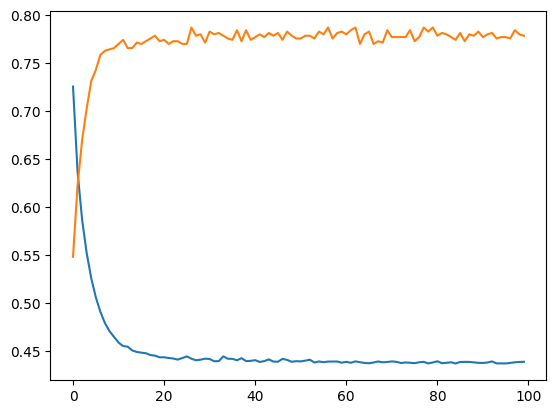

In [296]:
plt.plot([i for i in range(epochs)], history.history['loss'], history.history['binary_accuracy'])

In [297]:
dnn_model_1.evaluate(credit_batches_val)

5/5 [==============================] - 0s 3ms/step - loss: 0.5423 - binary_accuracy: 0.7000


[0.542330801486969, 0.699999988079071]

In [168]:
# new model with different activation functions

def dnn_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=tf.keras.metrics.BinaryAccuracy(),
                optimizer=tf.keras.optimizers.Adam())
  return model

dnn_model_relu_sigmoid = dnn_model(credit_preprocessing_train, train_inputs)

In [169]:
history = dnn_model_relu_sigmoid.fit(credit_batches_train, epochs=epochs, verbose='auto')

Epoch 1/100


/home/filip/py-env/aai-2023-1/lib/python3.9/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22/22 [==============================] - 1s 3ms/step - loss: 0.6876 - binary_accuracy: 0.5657
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6034 - binary_accuracy: 0.7000
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5679 - binary_accuracy: 0.7029
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5335 - binary_accuracy: 0.7286
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4997 - binary_accuracy: 0.7500
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4649 - binary_accuracy: 0.7814
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4412 - binary_accuracy: 0.7871
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4201 - binary_accuracy: 0.8071
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4071 - binary_accuracy: 0.8186
Epoch 10/100
22/22 [==============================] - 0s 2

In [171]:
dnn_model_relu_sigmoid.evaluate(credit_batches_train)

22/22 [==============================] - 0s 2ms/step - loss: 3.0556e-04 - binary_accuracy: 1.0000


[0.00030555881676264107, 1.0]

In [170]:
dnn_model_relu_sigmoid.evaluate(credit_batches_val)

5/5 [==============================] - 0s 2ms/step - loss: 1.6638 - binary_accuracy: 0.7667


/home/filip/py-env/aai-2023-1/lib/python3.9/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


[1.6638044118881226, 0.7666666507720947]

In [173]:
# Try with dropout layers

def dnn_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=tf.keras.metrics.BinaryAccuracy(),
                optimizer=tf.keras.optimizers.Adam())
  return model

dnn_model_dropouts = dnn_model(credit_preprocessing_train, train_inputs)

In [174]:
history = dnn_model_dropouts.fit(credit_batches_train, epochs=epochs, verbose=1)

Epoch 1/100


/home/filip/py-env/aai-2023-1/lib/python3.9/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22/22 [==============================] - 1s 3ms/step - loss: 0.7863 - binary_accuracy: 0.5714
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7441 - binary_accuracy: 0.5857
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6829 - binary_accuracy: 0.6186
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7065 - binary_accuracy: 0.6114
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6769 - binary_accuracy: 0.6014
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7047 - binary_accuracy: 0.6157
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6475 - binary_accuracy: 0.6443
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6502 - binary_accuracy: 0.6529
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6500 - binary_accuracy: 0.6600
Epoch 10/100
22/22 [==============================] - 0s 2

In [176]:
dnn_model_dropouts.evaluate(credit_batches_train)

22/22 [==============================] - 0s 2ms/step - loss: 0.5008 - binary_accuracy: 0.7014


[0.500798761844635, 0.7014285922050476]

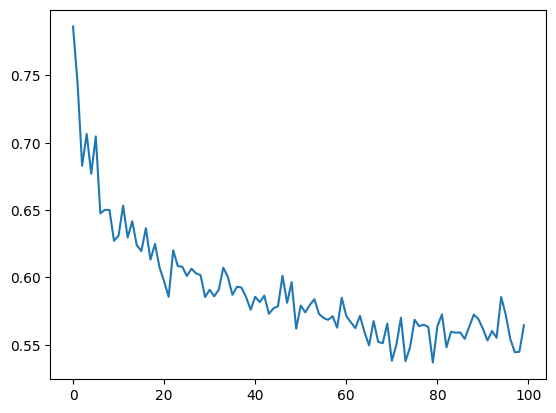

In [177]:
plt.plot([i for i in range(epochs)], history.history['loss'])

In [210]:
del dnn_model
del history

In [211]:
# Decrease dropout and learning rate

def dnn_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=tf.keras.metrics.BinaryAccuracy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))
  return model

dnn_model_dropout_1 = dnn_model(credit_preprocessing_train, train_inputs)

In [212]:
epochs = 250
history = dnn_model_dropout_1.fit(credit_batches_train, epochs=epochs, verbose=0)

/home/filip/py-env/aai-2023-1/lib/python3.9/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


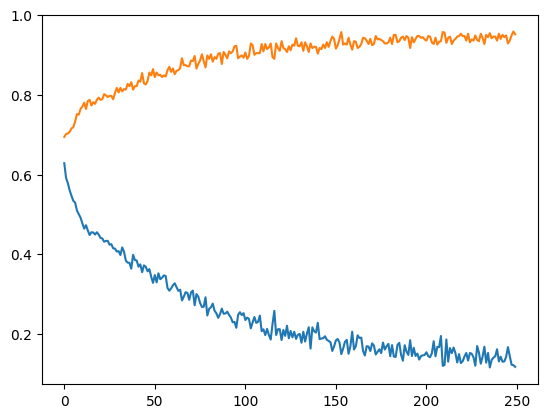

In [213]:
plt.plot([i for i in range(epochs)], history.history['loss'], history.history['binary_accuracy'])

In [214]:
dnn_model_dropout_1.evaluate(credit_batches_val)

5/5 [==============================] - 0s 2ms/step - loss: 0.8764 - binary_accuracy: 0.7467


[0.8763694167137146, 0.746666669845581]

In [ ]:
del dnn_model
del history

In [215]:
# Add L2 weight regularization

def dnn_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(64, kernel_regularizer='l2', activation='relu'),
    layers.Dense(32, kernel_regularizer='l2', activation='relu'),
    layers.Dense(16, kernel_regularizer='l2', activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=tf.keras.metrics.BinaryAccuracy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005))
  return model

dnn_model_l2 = dnn_model(credit_preprocessing_train, train_inputs)

In [216]:
epochs = 150
history = dnn_model_l2.fit(credit_batches_train, epochs=epochs, verbose=0)

/home/filip/py-env/aai-2023-1/lib/python3.9/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


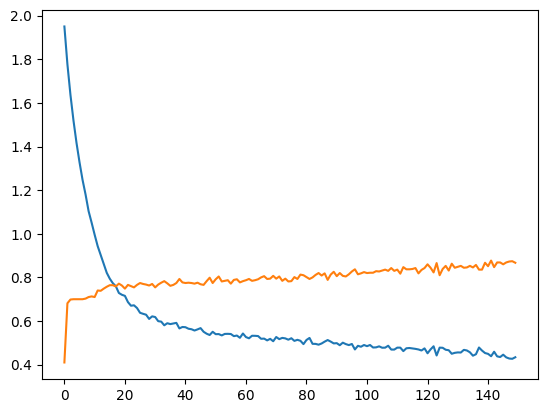

In [217]:
plt.plot([i for i in range(epochs)], history.history['loss'], history.history['binary_accuracy'])

In [219]:
dnn_model_l2.evaluate(credit_batches_val)

5/5 [==============================] - 0s 3ms/step - loss: 0.6005 - binary_accuracy: 0.7800


[0.6004582643508911, 0.7799999713897705]

In [220]:
dnn_model_l2.evaluate(credit_batches_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6342 - binary_accuracy: 0.7333


[0.6341845393180847, 0.7333333492279053]

# Model Performance Comparison

In [302]:
def acc(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    return acc

def f1(model, X, y):
    y_pred = model.predict(X)
    f1 = f1_score(y, y_pred)
    return f1

# Accuracy
rf_acc = acc(rf_best, X_test, Y_test)
rf_os_acc = acc(rf_os_best, X_test, Y_test)
rf_os_smoten_acc = acc(rf_os_smoten_best, X_test, Y_test)
rf_us_acc = acc(rf_us_best, X_test, Y_test)
rf_ss_acc = acc(rf_ss_best, X_test_SS, y_test_SS)

lr_acc = acc(lr, X_test, Y_test)
lr_ss_acc = acc(lr_SS, X_test_SS, y_test_SS)
lr_smoten_acc = acc(lr_smoten, X_test, Y_test)
lr_cv_acc = acc(lr_cv, X_test, Y_test)

dnn_acc = dnn_model_1.evaluate(credit_batches_test, return_dict=True)['binary_accuracy']
dnn_relu_sigmoid_acc = dnn_model_relu_sigmoid.evaluate(credit_batches_test, return_dict=True)['binary_accuracy']
dnn_dropout_1_acc = dnn_model_dropout_1.evaluate(credit_batches_test, return_dict=True)['binary_accuracy']
dnn_dropouts_acc = dnn_model_dropouts.evaluate(credit_batches_test, return_dict=True)['binary_accuracy']
dnn_l2_acc = dnn_model_l2.evaluate(credit_batches_test, return_dict=True)['binary_accuracy']

# F1
rf_f1 = f1(rf_best, X_test, Y_test)
rf_os_f1 = f1(rf_os_best, X_test, Y_test)
rf_os_smoten_f1 = f1(rf_os_smoten_best, X_test, Y_test)
rf_us_f1 = f1(rf_us_best, X_test, Y_test)
rf_ss_f1 = f1(rf_ss_best, X_test_SS, y_test_SS)

lr_f1 = f1(lr, X_test, Y_test)
lr_ss_f1 = f1(lr_SS, X_test_SS, y_test_SS)
lr_smoten_f1 = f1(lr_smoten, X_test, Y_test)
lr_cv_f1 = f1(lr_cv, X_test, Y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6342 - binary_accuracy: 0.7333


In [306]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['RF', 
                        'RF OverSampling', 
                        'RF SMOTEN', 
                        'RF UnderSampling', 
                        'RF Stratified', 
                        'LR', 
                        'LR Stratified', 
                        'LR SMOTEN', 
                        'LR Cross-validation',
                        'DNN',
                        'DNN ReLU',
                        'DNN Big Dropout',
                        'DNN Small Dropout',
                        'DNN L2 reg.'])
tbl['Accuracy']=pd.Series([rf_acc, 
                           rf_os_acc, 
                           rf_os_smoten_acc, 
                           rf_us_acc, 
                           rf_ss_acc,
                           lr_acc,
                           lr_ss_acc,
                           lr_smoten_acc,
                           lr_cv_acc,
                           dnn_acc,
                           dnn_relu_sigmoid_acc,
                           dnn_dropout_1_acc,
                           dnn_dropouts_acc,
                           dnn_l2_acc])
tbl['F1_Score']=pd.Series([rf_f1, 
                           rf_os_f1, 
                           rf_os_smoten_f1, 
                           rf_us_f1, 
                           rf_ss_f1,
                           lr_f1,
                           lr_ss_f1,
                           lr_smoten_f1,
                           lr_cv_f1])
tbl.sort_values('Accuracy', ascending=False)

,Model,Accuracy,F1_Score
2,RF SMOTEN,0.975000,0.982206
11,DNN Big Dropout,0.793333,NaN
1,RF OverSampling,0.770000,0.839161
10,DNN ReLU,0.746667,NaN
0,RF,0.740000,0.832258
3,RF UnderSampling,0.735000,0.792157
13,DNN L2 reg.,0.733333,NaN
5,LR,0.730000,0.823529
7,LR SMOTEN,0.730000,0.798507
8,LR Cross-validation,0.730000,0.821192


In [305]:
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score', ascending=False)

,Model,Accuracy,F1_Score
2,RF SMOTEN,0.975000,0.982206
1,RF OverSampling,0.770000,0.839161
0,RF,0.740000,0.832258
5,LR,0.730000,0.823529
8,LR Cross-validation,0.730000,0.821192
4,RF Stratified,0.706667,0.813559
7,LR SMOTEN,0.730000,0.798507
3,RF UnderSampling,0.735000,0.792157
6,LR Stratified,0.660000,0.777293
9,DNN,0.680000,NaN
